# Digit Recognizer

## Import Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import tensorflow as tf

## Load Data

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype('single') #convert to single precision float, type accepted by PyTorch Linear Layers
X_test = X_test.astype('single')

X_train /= 255 #normalize between [0,1]
X_test /= 255

In [5]:
print(f'Training Data Shape: {X_train.shape}')
print(f'Training Ground Truth: {y_train.shape}')
print(f'Testing Data Shape: {X_test.shape}')
print(f'Testing Ground Truth : {y_test.shape}')

Training Data Shape: (60000, 28, 28)
Training Ground Truth: (60000,)
Testing Data Shape: (10000, 28, 28)
Testing Ground Truth : (10000,)


### Visualize Some Data

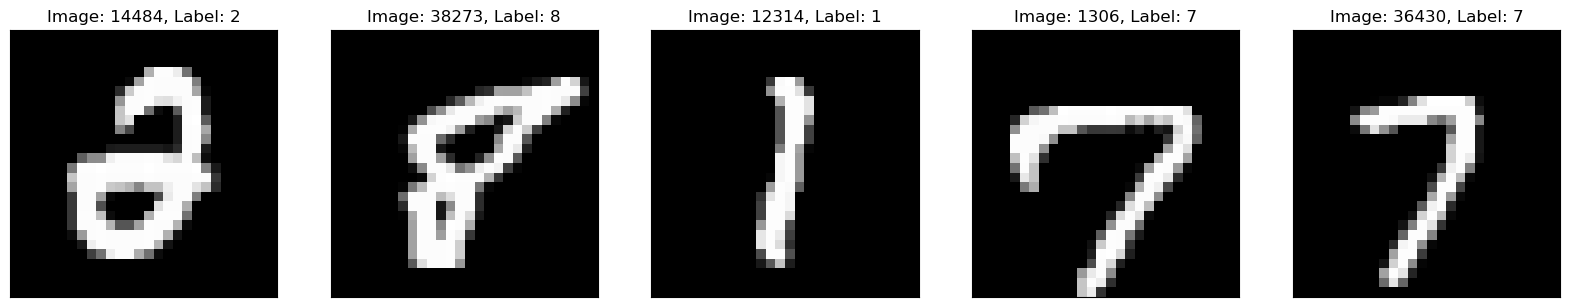

In [6]:
num_images = 5
ith_image = np.random.randint(low=0, high=X_train.shape[0], size=num_images)

fig, axs = plt.subplots(1,5, figsize=(20,4))

for i in np.arange(num_images):
    axs[i].tick_params(labelbottom=False,bottom=False,labelleft=False,left=False)
    axs[i].imshow(X_train[ith_image[i]],cmap='gray')
    axs[i].set_title(f"Image: {ith_image[i]}, Label: {y_train[ith_image[i]]}")

### Reshape Data for Autoencoder Input

In [7]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]) #reshape for autoencoder, vector input 
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]) 

print(f'Training Data Shape: {X_train.shape}')
print(f'Testing Data Shape: {X_test.shape}')

Training Data Shape: (60000, 784)
Testing Data Shape: (10000, 784)


## Classification Using PCA

In [8]:
pca = PCA(n_components=2)
pca.fit(X_train,y_train) #fit pca to entire training set
df = pd.DataFrame(pca.transform(X_test),columns=['PC1','PC2']) #apply transformation to testing set
df['digit'] = y_test

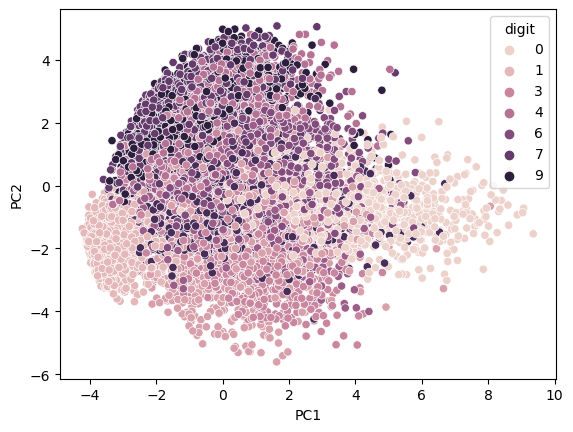

In [9]:
sns.scatterplot(data=df,x='PC1',y='PC2',hue='digit')
display()

## Classification Using Autoencoder

### Model

In [ ]:
from Model import Autoencoder

autoencoder = Autoencoder()
print(f'Model Architecture: \n {autoencoder}')

### Tensor Input

In [18]:
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)

X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

In [26]:
y_train_tensor.type_as('float')

TypeError: type_as(): argument 'other' (position 1) must be Tensor, not str

### Define Loss and Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(autoencoder.parameters())

### Train

In [ ]:
for i, input in enumerate(test_dataloader):
    
    print(input)
    # autoencoder.train()

    # label = y_train[0]

    # optimizer.zero_grad()

    # output = autoencoder(input)
    # loss = criterion(output, label)
    # loss.backward()
    # optimizer.step()

    # print statistics
    # print(i)
    # if i % 2000 == 1999: 
    #     print(f'[{i + 1:5d}] loss: {loss:.3f}')

print('Finished Training')